# The Gravity Disturbance

TODO

**Lesson objectives:** TODO

## Jupyter notebooks

This is a [Jupyter notebook](http://jupyter.org/). It's an interactive computing environment where you can mix text (like this), code, figures, video, etc. The notebook is organized into cells. This is a Markdown cell (click on it to see the source) and it can contain text, hyperlinks, images, and even Latex equations. Other cells contain source code and the output of the code. 

To execute a code cell, select it and type `shift+enter` or click on the *Run button* above. This will run the code and produce it's output. Make sure to run the cells in order first. You can alter the code in a cell and run it again to see what changed.

## Load the required libraries

These are the open-source libraries that we'll use in this notebook. You can safely ignore any warnings (text with red background) that pops up at this point.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import ipywidgets as widgets
from IPython.display import display
# We'll use this module for the gravity corrections
from fatiando.gravmag import normal_gravity
# Load our custom helper functions from helpers.py
from helpers import plot_field, minmax

/home/leo/miniconda3/envs/gravity-disturbance/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/home/leo/miniconda3/envs/gravity-disturbance/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


## Load the data

Our data is stored in the `data` folder as a netCDF file. See the notebook [`data/preparation.ipynb`](data/preparation.ipynb) for more information about how this file is generated.

In [2]:
data = xr.open_dataset('data/global-gravity.nc')
data

<xarray.Dataset>
Dimensions:           (latitude: 361, longitude: 721)
Coordinates:
  * latitude          (latitude) float32 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 ...
  * longitude         (longitude) float32 -180.0 -179.5 -179.0 -178.5 -178.0 ...
Data variables:
    gravity_earth     (latitude, longitude) float32 ...
    h_over_geoid      (latitude, longitude) float32 ...
    geoid             (latitude, longitude) float32 ...
    topography_grd    (latitude, longitude) float32 ...
    h_over_ellipsoid  (latitude, longitude) float32 ...
    topography_ell    (latitude, longitude) float32 ...

The grids that interest us are:

* `gravity_earth`: the raw gravity measured at the Earth's surface
* `h_over_ellipsoid`: the geometric (ellipsoidal) height of the gravity measurement
* `topography_ell`: the geometric height of the topography/bathymetry

## Gravity and the measurement height

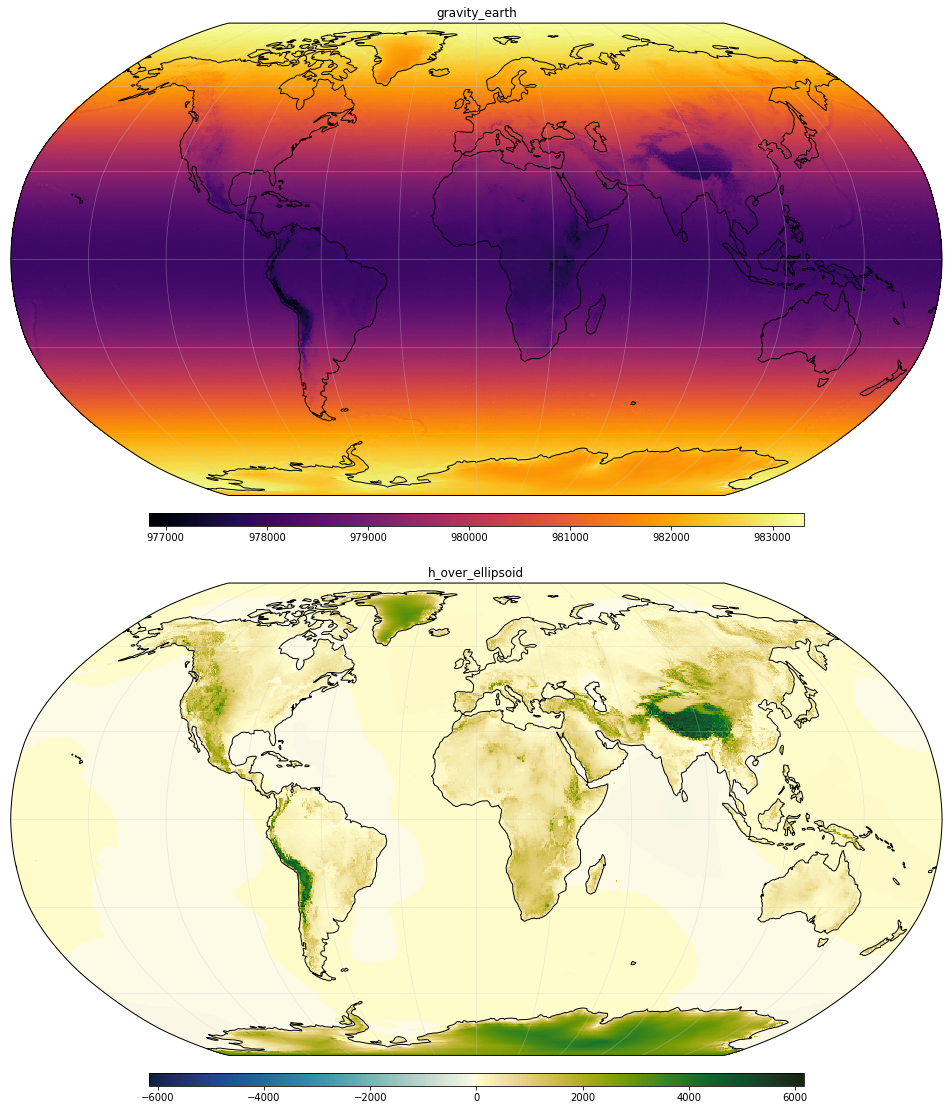

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(13, 16), subplot_kw=dict(projection=ccrs.Robinson()))
fields = ['gravity_earth', 'h_over_ellipsoid']
cmaps = ['inferno', cmocean.cm.delta]
for field, ax, cmap in zip(fields, axes.ravel(), cmaps):
    plot_field(ax, data, field, transform=ccrs.PlateCarree(), cmap=cmap)
plt.tight_layout(pad=0)

## Normal gravity

In [4]:
data['normal_gravity'] = normal_gravity.gamma_closed_form(data.latitude, data.h_over_ellipsoid)

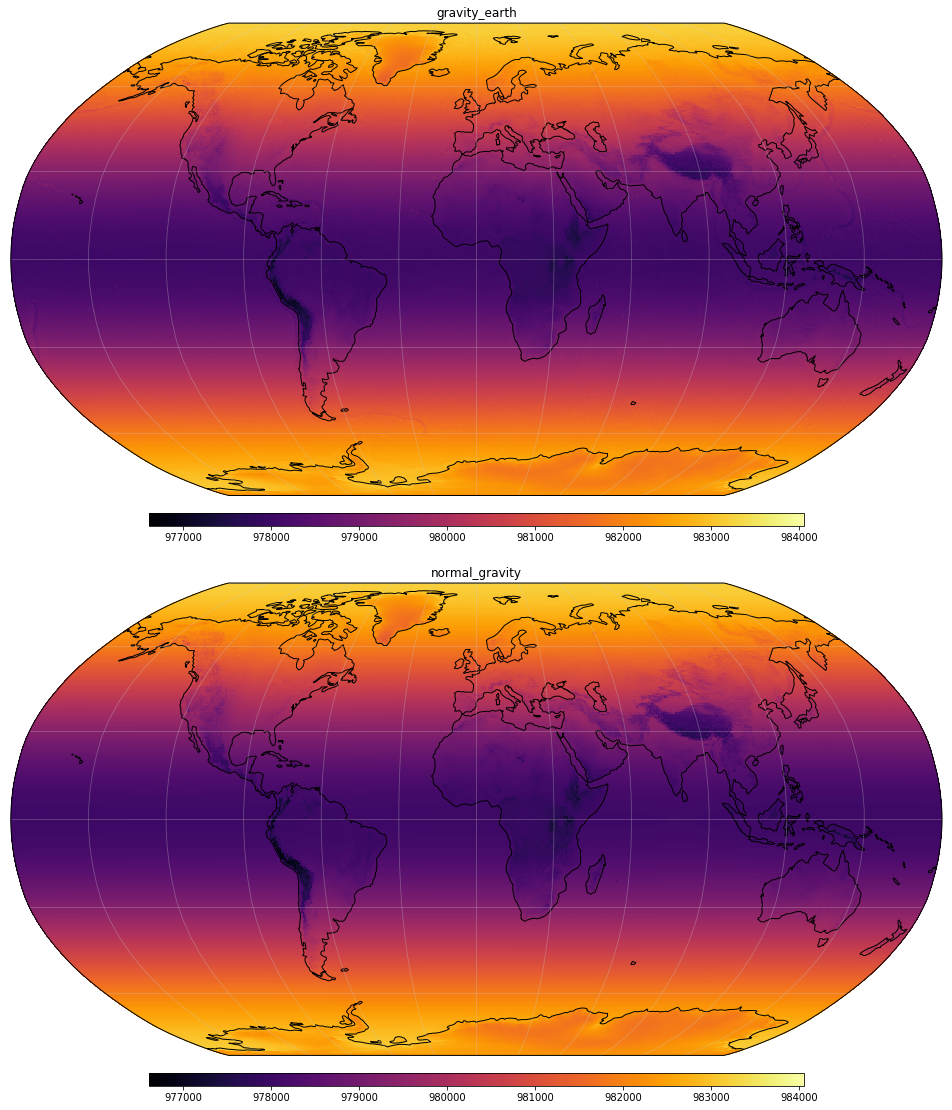

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(13, 16), subplot_kw=dict(projection=ccrs.Robinson()))
fields = ['gravity_earth', 'normal_gravity']
kwargs = minmax(data, fields)
for field, ax in zip(fields, axes.ravel()):  
    plot_field(ax, data, field, transform=ccrs.PlateCarree(), cmap='inferno', **kwargs)
plt.tight_layout(pad=0)

## The Gravity Disturbance

In [6]:
data['gravity_disturbance'] = data.gravity_earth - data.normal_gravity

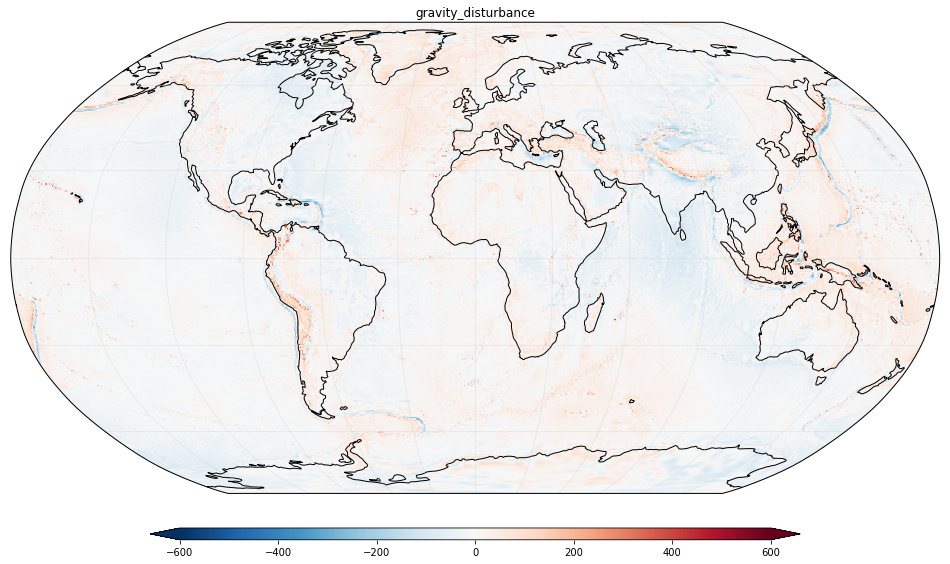

In [7]:
fig = plt.figure(figsize=(13, 16))
ax = plt.axes(projection=ccrs.Robinson())  
plot_field(ax, data, 'gravity_disturbance', transform=ccrs.PlateCarree(), cmap='RdBu_r',
           vmin=-600, vmax=600)
plt.tight_layout(pad=0)

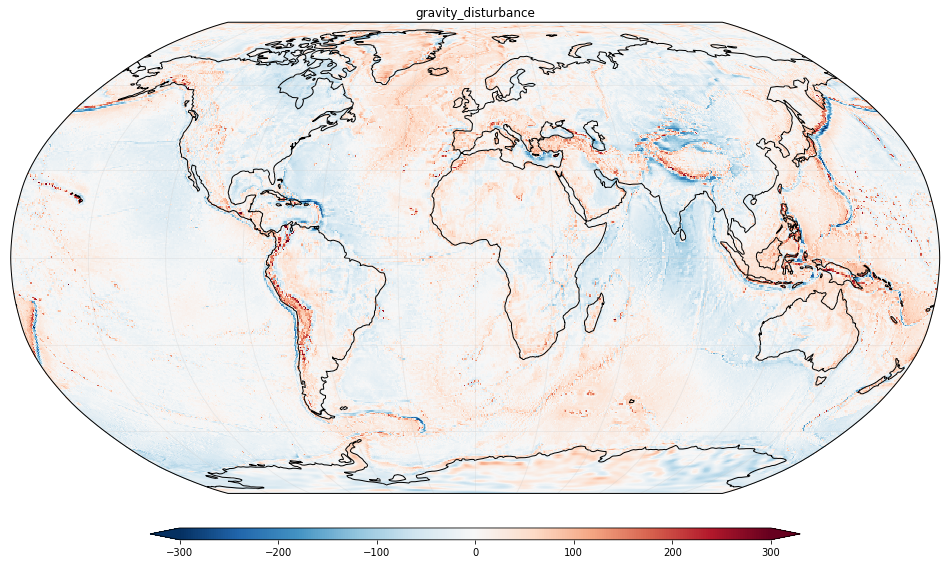

In [8]:
fig = plt.figure(figsize=(13, 16))
ax = plt.axes(projection=ccrs.Robinson())  
plot_field(ax, data, 'gravity_disturbance', transform=ccrs.PlateCarree(), cmap='RdBu_r',
           vmin=-300, vmax=300)
plt.tight_layout(pad=0)